In [81]:
from prepare_module import X_y_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# feature selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
# getting clean data
df = pd.read_csv('../data/Mayor_s_Action_Center_Service_Cases_Clean.csv', index_col=0)
target = 'is_less_than_one_week'

train, validate, test,\
     X_train,y_train,\
         X_validate, y_validate,\
              X_test, y_test = X_y_split(df, target=target, stratify=True)

## Part 1 Micro
1. **Univariate**
    1. Which keywords has the most cases?
        * Trash
    1. What are the most frequent reasons for the requests (the subcategories)?
        * Stolen
    1. Which township has the most cases?
    
1. **Bivariate**
    1. What is the relationship between the type of request(subcategory) and the response time?
    1. What is the relationship between the open date and the response time?
    1. What is the relationship between the year it was creaetd and the response time?
    1. What is the relationship between the month it was created and the response time?
    1. What is the relationship between the week it was created and the response time?
    1. What is the relationship between the weekday it was created and the response time?
    1. What is the relationship between the zip code of the incident and the response time?

    What else needds to be completed?

### Univariate

In [5]:
# getting the shape
print(df.shape)
df.head(1)

(772962, 12)


,keyword,subcategory,township,zip,council_district,origin,num_open_cases,year_created,month_created,week_created,weekday_created,is_less_than_one_week
0,Chuckhole,Street (Chuckhole),CENTER,46225,16,RequestIndy Online,0,2015,6,23,0,True


In [4]:
# What keyowrd has the most cases?
train.keyword.value_counts()

trash = train.loc[train['keyword'] == 'Trash']

trash.subcategory.value_counts()

subcategory
96 Gal Cart - Stolen         21517
96 Gal Cart - Other          18548
96 Gal Trash (Missed)        14615
96 Gal Trash (Block)         10679
Heavy                         8970
96 Gal Cart - Buy             5531
Complaint/Crew                4366
96 Gal Cart - New Request     3023
Recycling New Service         1701
Freon                         1654
Hand Collection (Missed)      1067
Leaves                         764
Hand Collection (Block)        579
Property Damage                174
96 Gal Cart                      1
Name: count, dtype: int64

In [48]:
# trash[target].plot.count()

#### Which township has the most cases?

In [31]:
# What township has the most cases?
train.township.value_counts()

# What zip codes are in center?
micro_explore = train.loc[(train['township'] == 'CENTER') & (train['keyword'] == 'Trash') ]


### Bivariate

##### **What is the relationship between the type of request(subcategory) and the response time?**

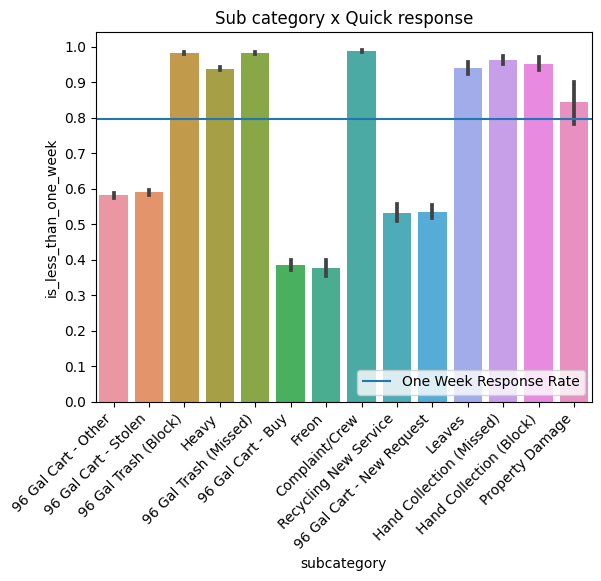

In [68]:
# getting target
# target = trash['is_less_than_one_week']
y_ticks = [i/10.0 for i in range(0,11)]
# getting stacked bar chart to show the relationships
plt.title('Sub category x Quick response')
sns.barplot(data=trash, x='subcategory', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Takeaways:**
* There seems to be a clear difference between each subcategory and the response rate

**Actions:**
* Run a chi2 hypothesis test to see

In [25]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the subcategory are independent"
alternative_hypothesis = "there is a relationship between subcategory and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.subcategory, train[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis that a reponse in less than a week and the subcategory are independent
Sufficient evidence to move forward understanding that there is a relationship between subcategory and fast reponse


0.0

##### What is the relationship between the open date and the response time?
Note: There isnt a way to run a stats test on this data Come back later

##### What is the relationship between the year it was created and the response time?
Note: I don't think it is uselful to use the year becasue the year will never repeat

In [ ]:
plt.title('Reponse Rate by Year')
sns.barplot(data=trash, x='year_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.legend(loc='lower right')
plt.show()

##### **What is the relationship between the month it was created and the response time?**
Note: there is likely a relatio nship between month it was created and week it was created


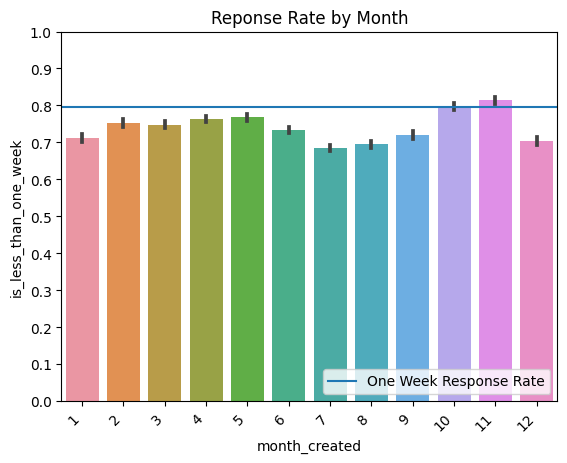

In [69]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Month')
sns.barplot(data=trash, x='month_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Note**
* There is a slight shift from the summer to the fall/winter months which may be worth noting

**Action:**
* Run a chisqured test to see

In [23]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the month of the request are independent"
alternative_hypothesis = "there is a relationship between  month of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.month_created, train[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the month of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between  month of the request and fast reponse


0.0

##### **What is the relationship between the week it was created and the response time?**


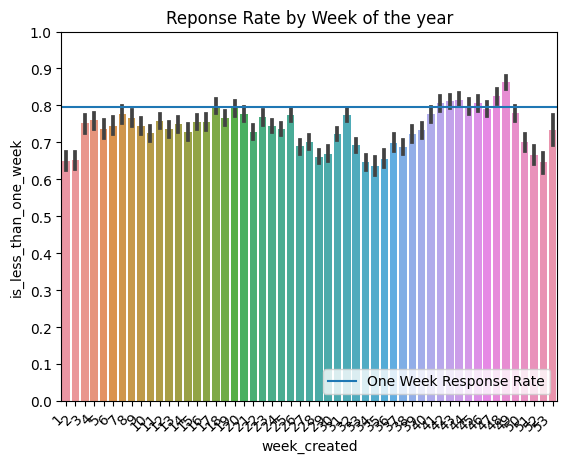

In [71]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Week of the year')
sns.barplot(data=trash, x='week_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Note:**
* This has a direct correlation with the month, with more variablility here than in the month
* If I'm not mistaken, the weeks will always line up with the months so selecting the week will likely provide better results

**Actions:**
* Chi2

In [22]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the week of the request are independent"
alternative_hypothesis = "there is a relationship between  week of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.week_created, train[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the week of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between  week of the request and fast reponse


0.0

##### **What is the relationship between the weekday it was created and the response time?**


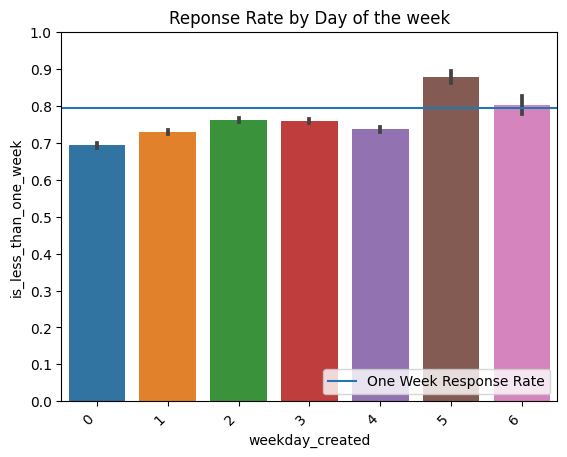

In [75]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Day of the week')
sns.barplot(data=trash, x='weekday_created', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 45, ha='right')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Notes:**
* There appears to be a slight change that can be examined
* I don't know which day is which
    * From docs 'The day of the week with Monday=0, Sunday=6.'

**Actions:**
* chi2

In [76]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the weekday the request is created are independent"
alternative_hypothesis = "there is a relationship between the weekday the request is created and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(trash.weekday_created, trash[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the weekday the request is created are independent
Sufficient evidence to move forward understanding that there is a relationship between the weekday the request is created and fast reponse


4.449611477680137e-100

##### **What is the relationship between the zip code of the incident and the response time?**

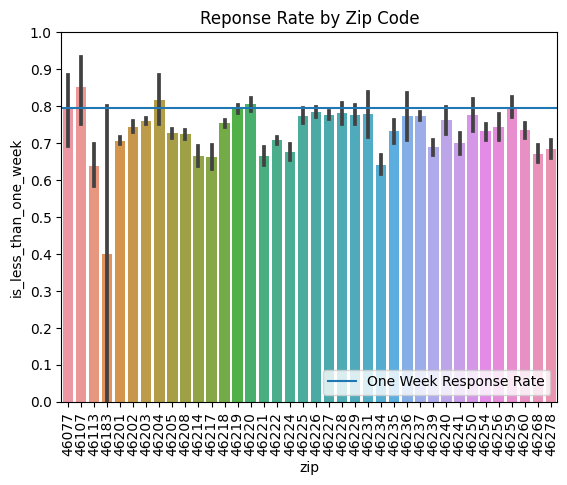

In [79]:
y_ticks = [i/10.0 for i in range(0,11)]

plt.title('Reponse Rate by Zip Code')
sns.barplot(data=trash, x='zip', y=target)
one_week_response_rate = train[target].mean()
plt.axhline(one_week_response_rate, label='One Week Response Rate')
plt.xticks(rotation = 90)
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.show()

**Notes**
* Very clear differences

**Actions:**
* chi2


In [21]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "a reponse in less than a week and the zip code of the request are independent"
alternative_hypothesis = "there is a relationship between the zip code of the request and fast reponse"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.zip, train[target])

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

p

Reject the null hypothesis that a reponse in less than a week and the zip code of the request are independent
Sufficient evidence to move forward understanding that there is a relationship between the zip code of the request and fast reponse


0.0

#### **What is the relationship between the number of open cases and response rate?**

In [ ]:
plt.title('Number of Open Cases per Response')
sns.boxplot(data=train, x=target, y='num_open_cases')
avg_num_cases_open = train['num_open_cases'].mean()
plt.axhline(avg_num_cases_open, label='Average Number of Cases Open', color='r')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

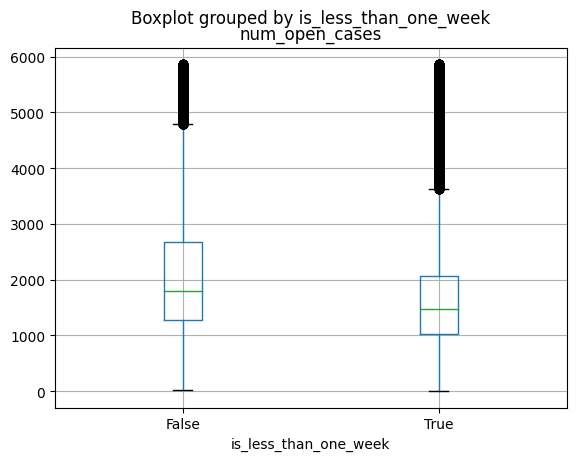

In [11]:
ax = train.boxplot(by='is_less_than_one_week', column='num_open_cases')

**Notes:**
* There is a clear difference

**Actions**
* Investigate the outliers
* Find the distributuion of the num open cases
* Run appropriate stats test

In [16]:
# stats test a 2 sample t-test 2 tailed (independent t-test) will be conducted to compare two observed means (1st-  mean of false  2nd- mean of true)
# Null hypothesis - both means are the same
# alt hypothesis - both means are different
# first need to test for variance 
# Null - the variabces are equla
# Alt -  the variances are unequal

fast_open_cases = train[train['is_less_than_one_week'] == True].num_open_cases
slow_open_cases = train[train['is_less_than_one_week'] == False].num_open_cases

print(fast_open_cases.var())
print(slow_open_cases.var())
# unequal variance

837515.2776611354
1145635.3817751545


In [19]:

# Let's run a independtn t-test, to have more confidence
alpha = 0.05
null_hypothesis = "number of open cases are equal between fast and slow reponses"
alternative_hypothesis = "number of open cases is not equal between fast and slow responses"

print(fast_open_cases.var())
print(slow_open_cases.var())

t, p = stats.ttest_ind(fast_open_cases, slow_open_cases, equal_var=False)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

t, p

837515.2776611354
1145635.3817751545
Reject the null hypothesis that number of open cases are equal between fast and slow reponses
Sufficient evidence to move forward understanding that number of open cases is not equal between fast and slow responses


(-98.53619372594846, 0.0)

#### Notes:
* Subcategory
* Creation month and creation week - I believe these have interdependence - test for this (multicollinearity)
* Weekday
* Zip code
* Number of open cases have statistically significant differences between the target and others

Actions: Will look for the 5 most impactful using the selectkbest

## Part 2 - Micro
1. **Multivariate**
    1. Subcategory from trash - Zip for center - response
    1. Creation week - reponse per zip
    1. Weekday reponse - zip

In [65]:
micro_explore.columns

Index(['keyword', 'subcategory', 'township', 'zip', 'council_district',
       'origin', 'num_open_cases', 'year_created', 'month_created',
       'week_created', 'weekday_created', 'is_less_than_one_week'],
      dtype='object')

/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


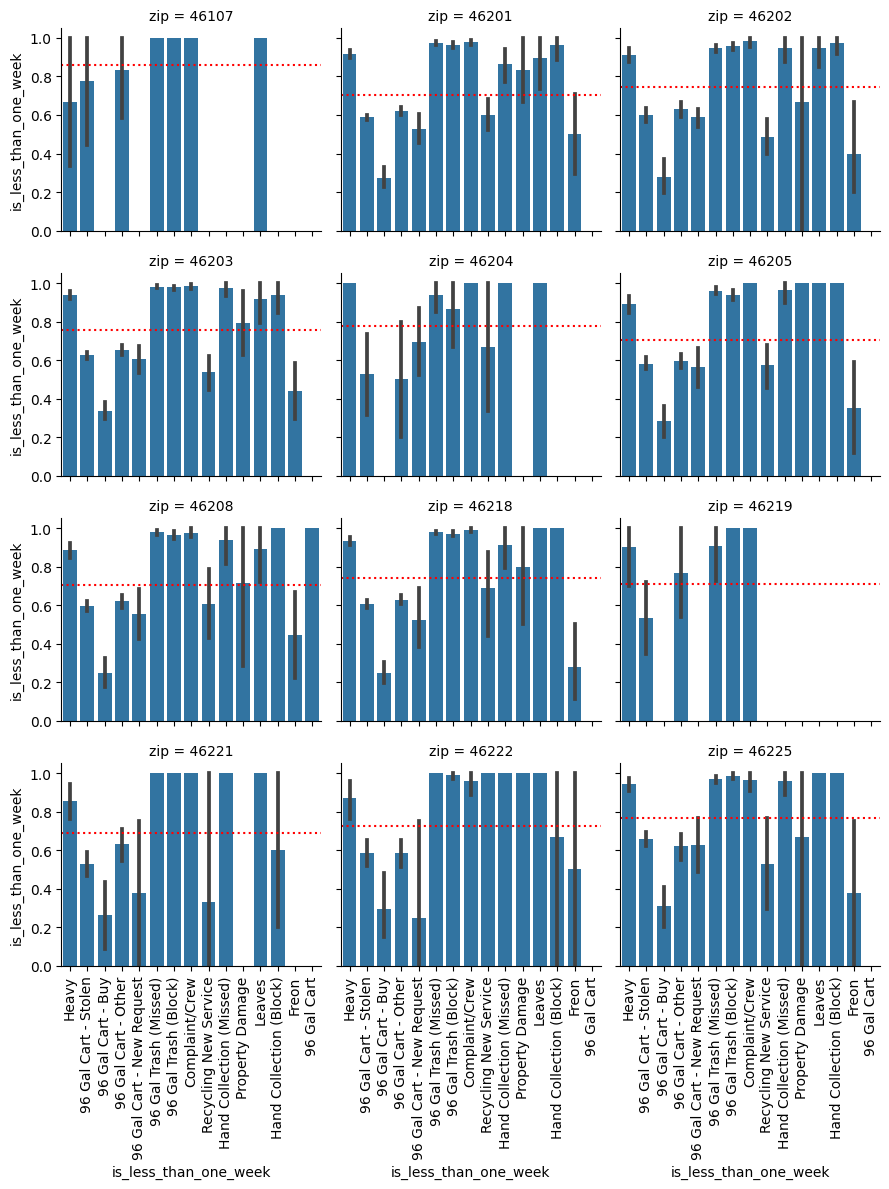

In [76]:
def plot_mean(data,**kwargs):
    m = data.mean()
    plt.axhline(m, **kwargs)


subcat = micro_explore.subcategory.unique()
g = sns.FacetGrid(micro_explore, col='zip', col_wrap=3)
g.map(sns.barplot, 'subcategory', target, order=subcat)
one_week_response_rate = train[target].mean()
g.tick_params(axis='x', labelrotation =90)
g.tight_layout()
g.map(plot_mean, target, ls=":", c='r')
plt.show()

/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


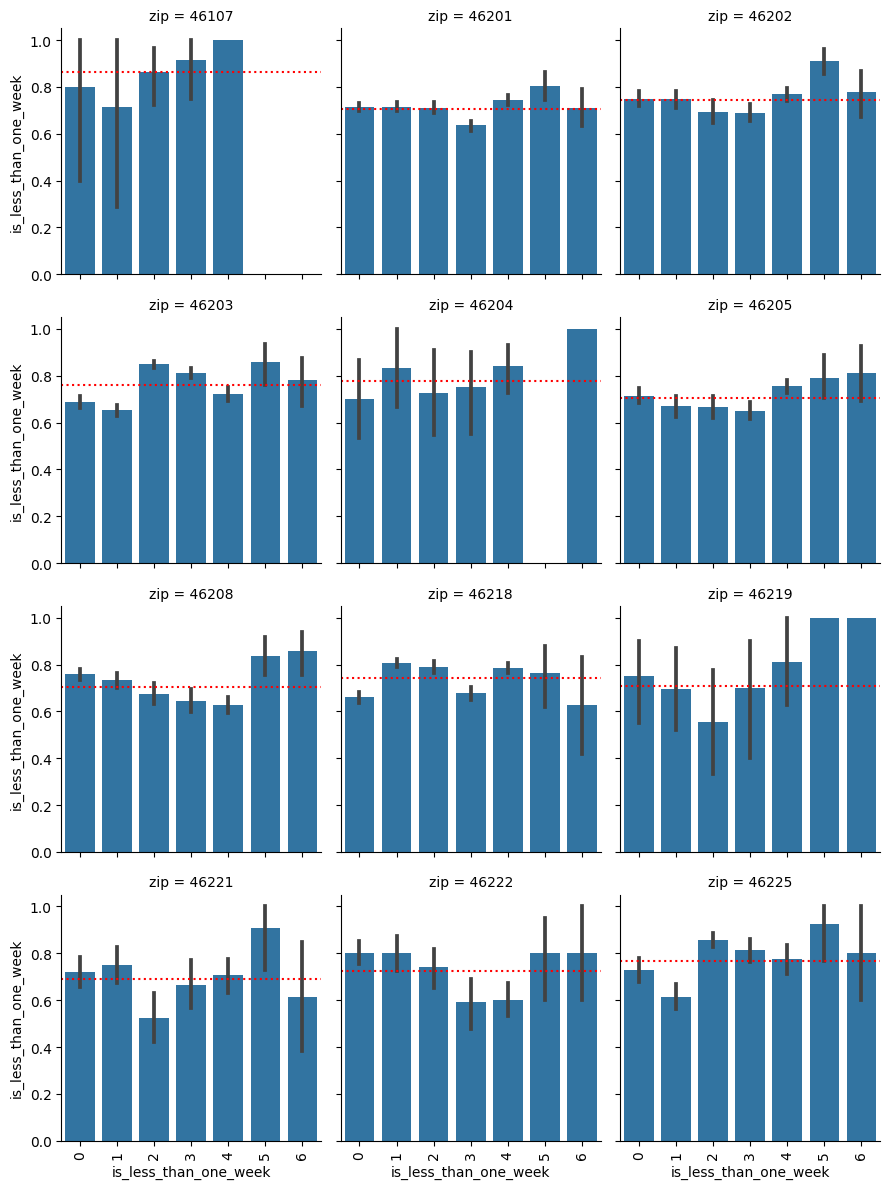

In [75]:
def plot_mean(data,**kwargs):
    m = data.mean()
    plt.axhline(m, **kwargs)


weekday = micro_explore.weekday_created.sort_values().unique()
one_week_response_rate = train[target].mean()

g = sns.FacetGrid(micro_explore, col='zip', col_wrap=3)
g.map(sns.barplot, 'weekday_created', target, order=weekday)
# one_week_response_rate = train[target].mean()
g.tick_params(axis='x', labelrotation =90)
g.tight_layout()
# g.axhline(one_week_response_rate, label='One Week Response Rate')
g.map(plot_mean, target, ls=":", c='r')
plt.show()

/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/aaron/codeup-data-science/env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


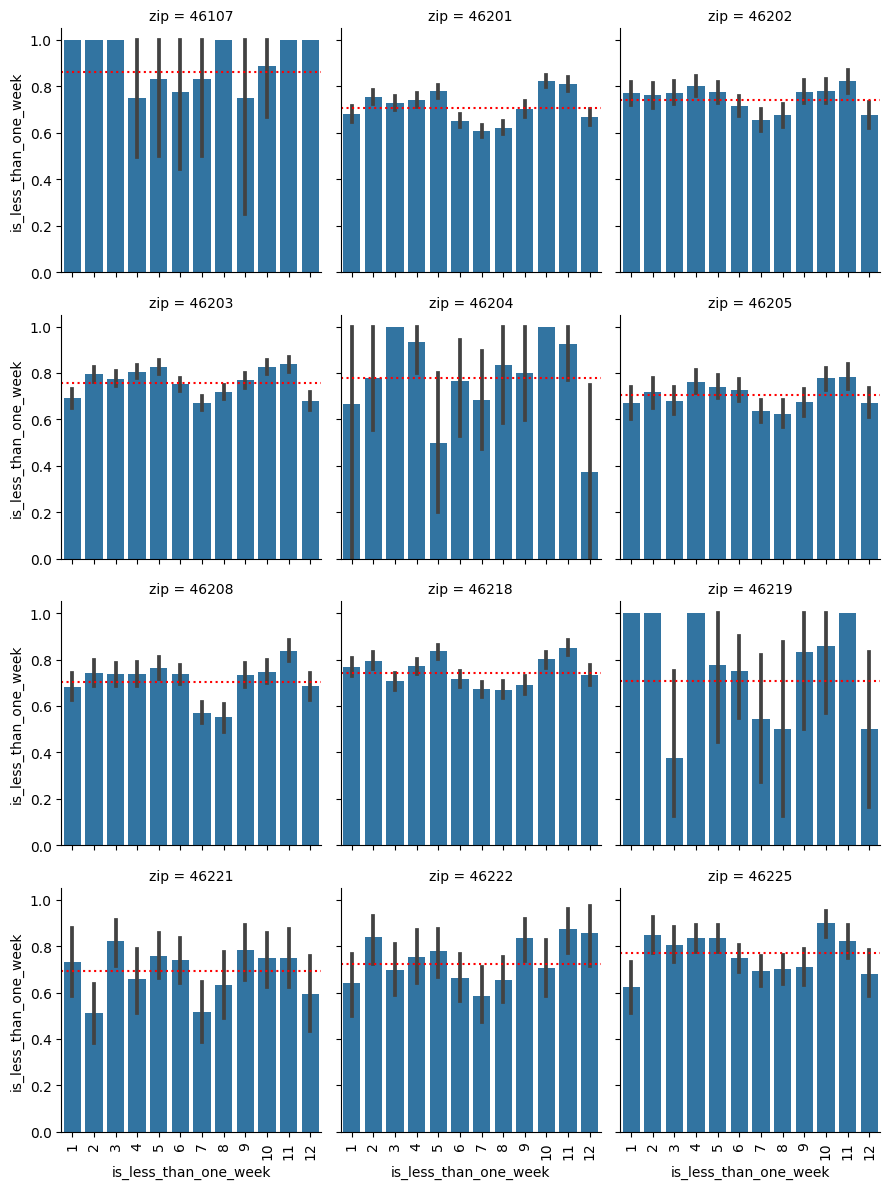

In [78]:
def plot_mean(data,**kwargs):
    m = data.mean()
    plt.axhline(m, **kwargs)


month = micro_explore.month_created.sort_values().unique()
one_week_response_rate = train[target].mean()

g = sns.FacetGrid(micro_explore, col='zip', col_wrap=3)
g.map(sns.barplot, 'month_created', target, order=month)
g.tick_params(axis='x', labelrotation =90)
g.tight_layout()
g.map(plot_mean, target, ls=":", c='r')
plt.show()

**Notes:**
* There are differences that can be seen, but to be honest I'm not really sure how to use this infornmatioin from here

## Part 3 - Selectkbest scores
NOTE - there is a old clean function created with other columns - this code will break.
* I am focused on the categorical variabvles and the trget is categorical so the best stats test in theics case is a chi squared test. 
* The seldct k best will now be used
* Resources: 
    * [sklearn 6.3 Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
    * [How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)
    * [Feature Selection Techniques in Machine Learning with Python](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
    * [LabelEncoder vs OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder)

#### Encoding

In [99]:
# encode_cat_features
# initialize and fit
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

oe.fit(X_train.drop(['num_open_cases', 'year_created', 'month_created'], axis=1))

# transform
X_train_enc = oe.transform(X_train.drop(['num_open_cases', 'year_created', 'month_created'], axis=1))
X_validate_enc = oe.transform(X_validate.drop(['num_open_cases', 'year_created', 'month_created'], axis=1))
X_test_enc = oe.transform(X_test.drop(['num_open_cases', 'year_created', 'month_created'], axis=1))

In [100]:
# encode_cat_target
#create and fit
le = LabelEncoder().fit(y_train)

# transform
y_train_enc = le.transform(y_train)
y_validate_enc = le.transform(y_validate)
y_test_enc = le.transform(y_test)

#### Selectkbest

In [102]:
# $ create
fs = SelectKBest(score_func=chi2, k=4)
# fit
fs.fit(X_train_enc, y_train_enc)
# transform
X_train_fs = fs.transform(X_train_enc)

print(X_train_enc.shape)
print(X_train_fs.shape)

(432858, 8)
(432858, 4)


Feature 0: 7483.874744
Feature 1: 119.360654
Feature 2: 1646.511819
Feature 3: 5084.526293
Feature 4: 2481.313014
Feature 5: 1.159816
Feature 6: 44859.282380
Feature 7: 9.280286


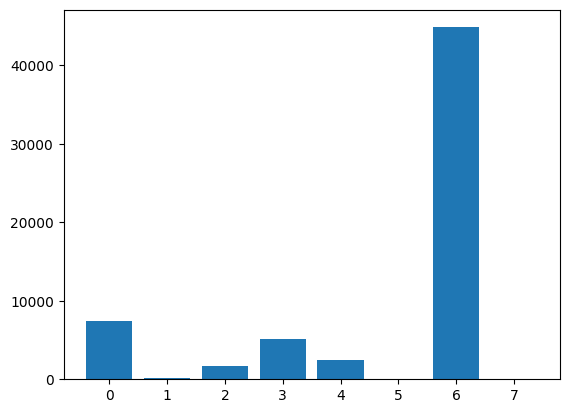

In [103]:
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [104]:
# get feature mask
mask = fs.get_support()
print(mask)

fs_columns = X_train.drop(['num_open_cases', 'year_created', 'month_created'], axis=1).iloc[:, mask].columns.to_list()

[ True False False  True  True False  True False]


In [105]:
print(fs_columns)
X_train.columns

['keyword', 'zip', 'council_district', 'week_created']


Index(['keyword', 'subcategory', 'township', 'zip', 'council_district',
       'origin', 'num_open_cases', 'year_created', 'month_created',
       'week_created', 'weekday_created'],
      dtype='object')

# Functions